In [1]:
import pandas as pd# reading the file other necessary operation  
import numpy as np# from that we can get mean median and other operation
from sklearn.preprocessing import StandardScaler # for scaling the data 
from sklearn.linear_model  import LogisticRegression # importing logoistic regression
from sklearn.model_selection import train_test_split # for splitting the data in to trainning and testing 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score #metric to check model performance
import matplotlib.pyplot as plt # visualization library , analysis of data 
import seaborn as sns # visualization library , analysis of data
%matplotlib inline

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=";")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
cat_columns=data[['job','marital','education','default','housing','contact', 'month', 'day_of_week','poutcome','loan']]

In [6]:
cat_columns

,job,marital,education,default,housing,contact,month,day_of_week,poutcome,loan
0,housemaid,married,basic.4y,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,telephone,may,mon,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,cellular,nov,fri,nonexistent,no
41184,blue-collar,married,professional.course,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,cellular,nov,fri,nonexistent,no


# domain Analysis


#1 - age (numeric)
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
#8 - contact: contact communication type (categorical: 'cellular','telephone')
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric)
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


import data
basic checks
#shape, nunique, value counts, isnull().sum(), value count for target column.
domain analysis
EDA
  univariate anaylysis
    bi varaiate analysis
    multi variate analysis
data pre processing
  imputing null values 
    duplicates
    convertind cate gotical to nurimcel using encoding techniques
once our data is clean
declare X and Y
split data using train
_test_split
if data is imbalanced then apply smote
scaling shpuld be done 
then model preperation 
and check the metrics on which u rgoing to evaluate
and try to improve that metrics by feature engineerign


In [7]:
print(data.shape)

(41188, 21)


In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
data.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [10]:
#We have 41188 data in each column

In [11]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#here we have each variable's basic statistic from our data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
#from the above info we get to know what type od data is present with us
#here we can see we have both categorical and numerical values

In [15]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
#The above code shows us all the variables present in our data which is also our column heading

In [17]:
# we now check if any column in our data has any null values

In [18]:
data.isnull().sum() / len(data) * 100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# We do a univariate analysis to check how each variable is distributed using for-loop for all categorical data

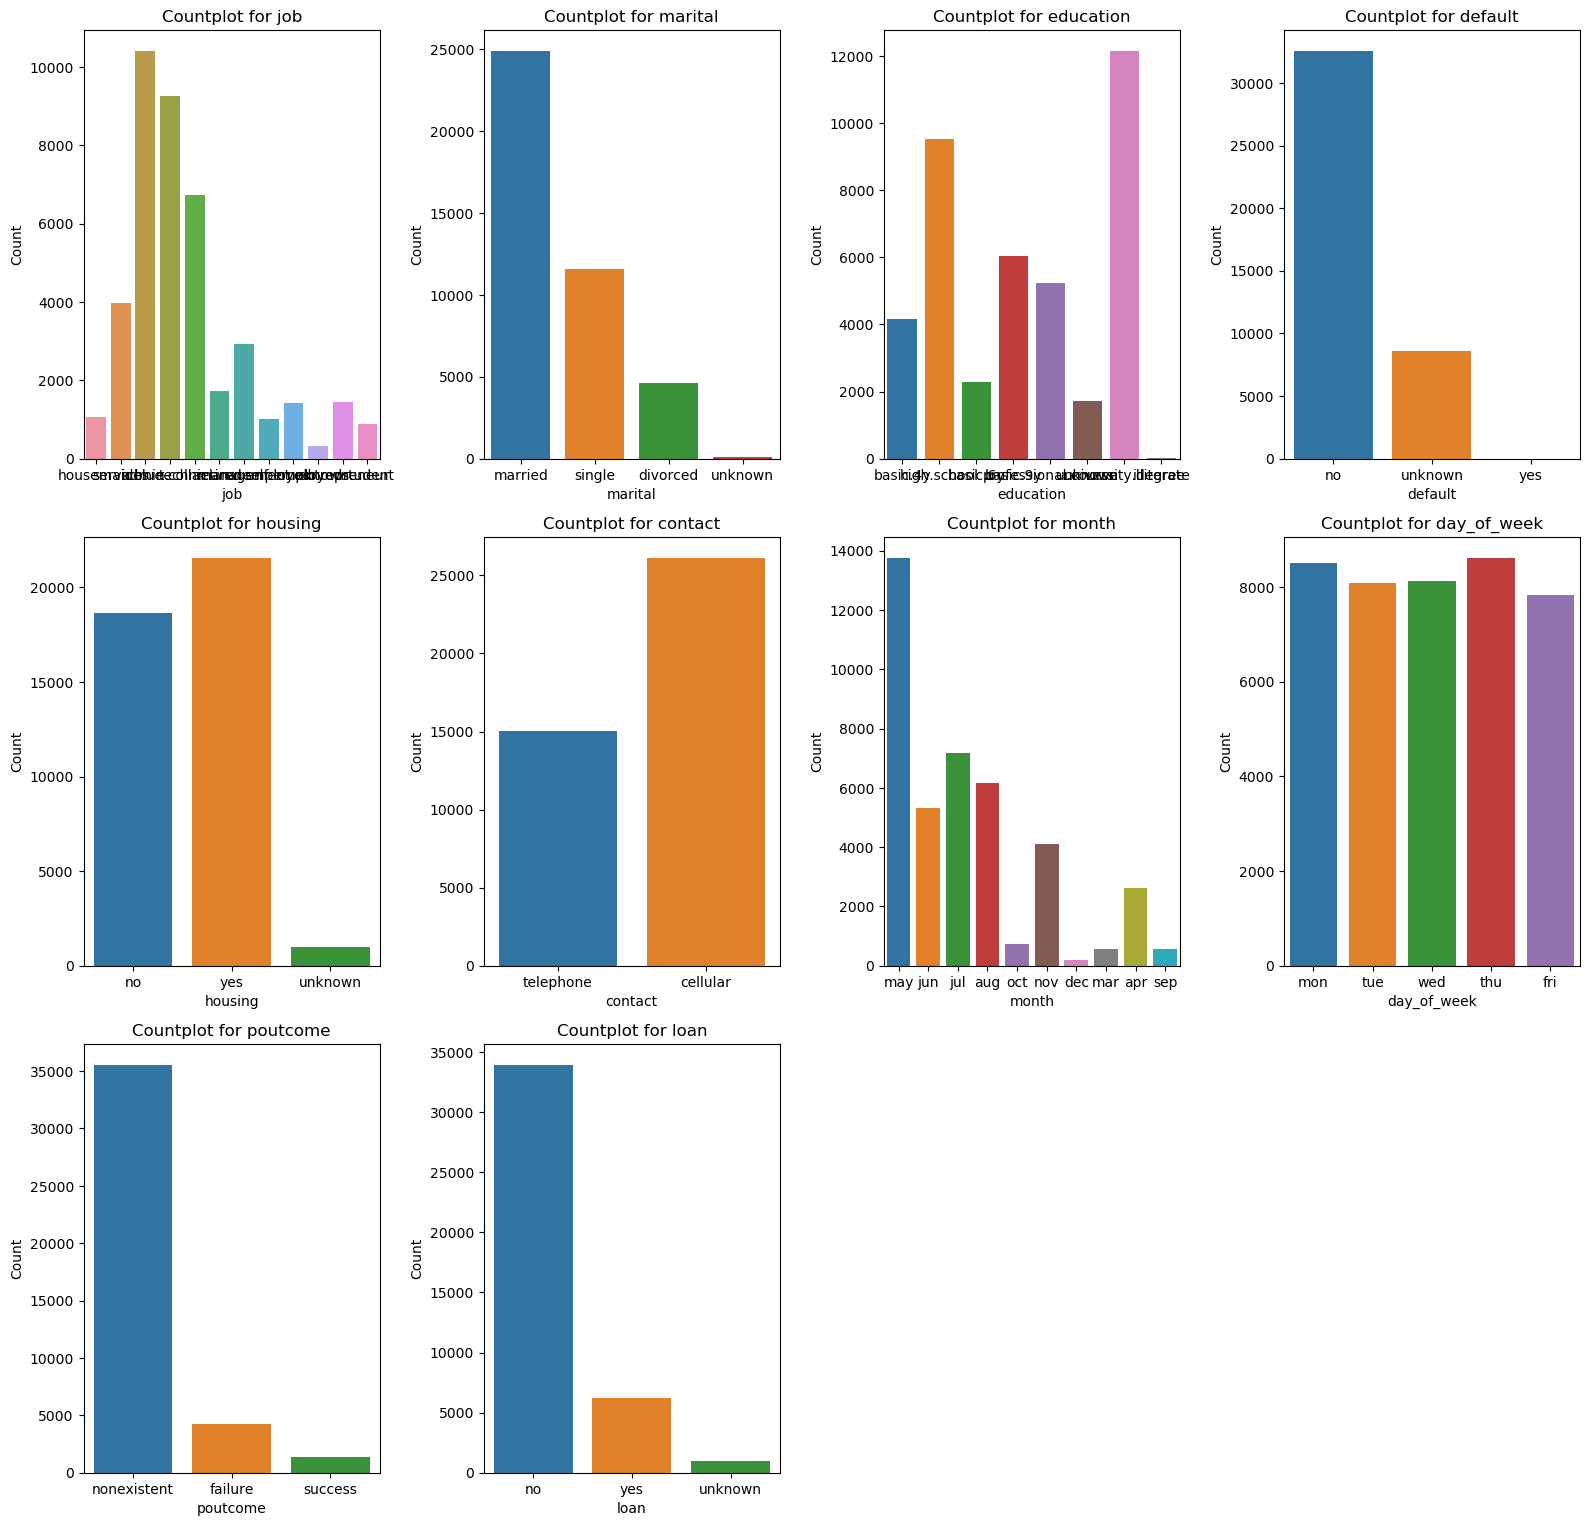

In [21]:
plt.figure(figsize=(16, 20))

for i, feature in enumerate(cat_columns):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, data=cat_columns)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


In [22]:
#To check how many different values are there in each variables

In [23]:
print (data.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


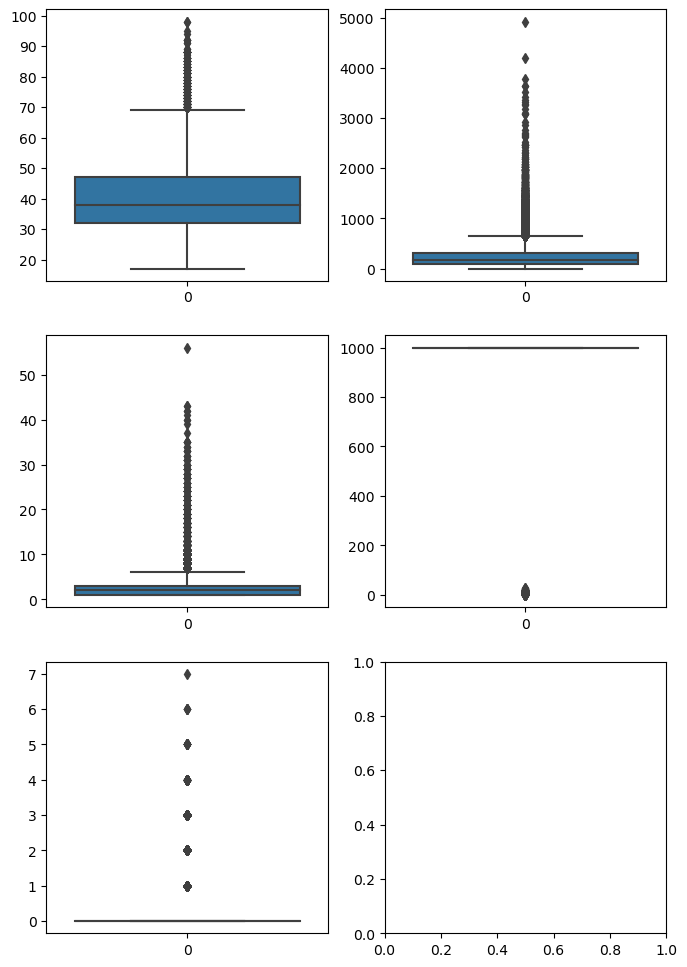

In [24]:
fig , ax  =  plt.subplots(3, 2, figsize  =(8, 12))
sns.boxplot(data.age , ax= ax[0, 0])
sns.boxplot(data.duration , ax= ax[0, 1])
sns.boxplot(data.campaign , ax= ax[1, 0])
sns.boxplot(data.pdays , ax= ax[1, 1])
sns.boxplot(data.previous , ax= ax[2, 0])

In [25]:
#Checking for the outliers

In [26]:
# Bivariate Analysis

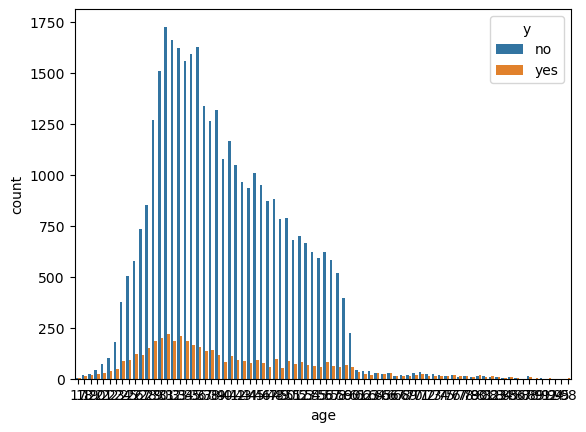

In [27]:
# Analyszing age with respect to the target variable

sns.countplot(x=data.age,hue=data.y)

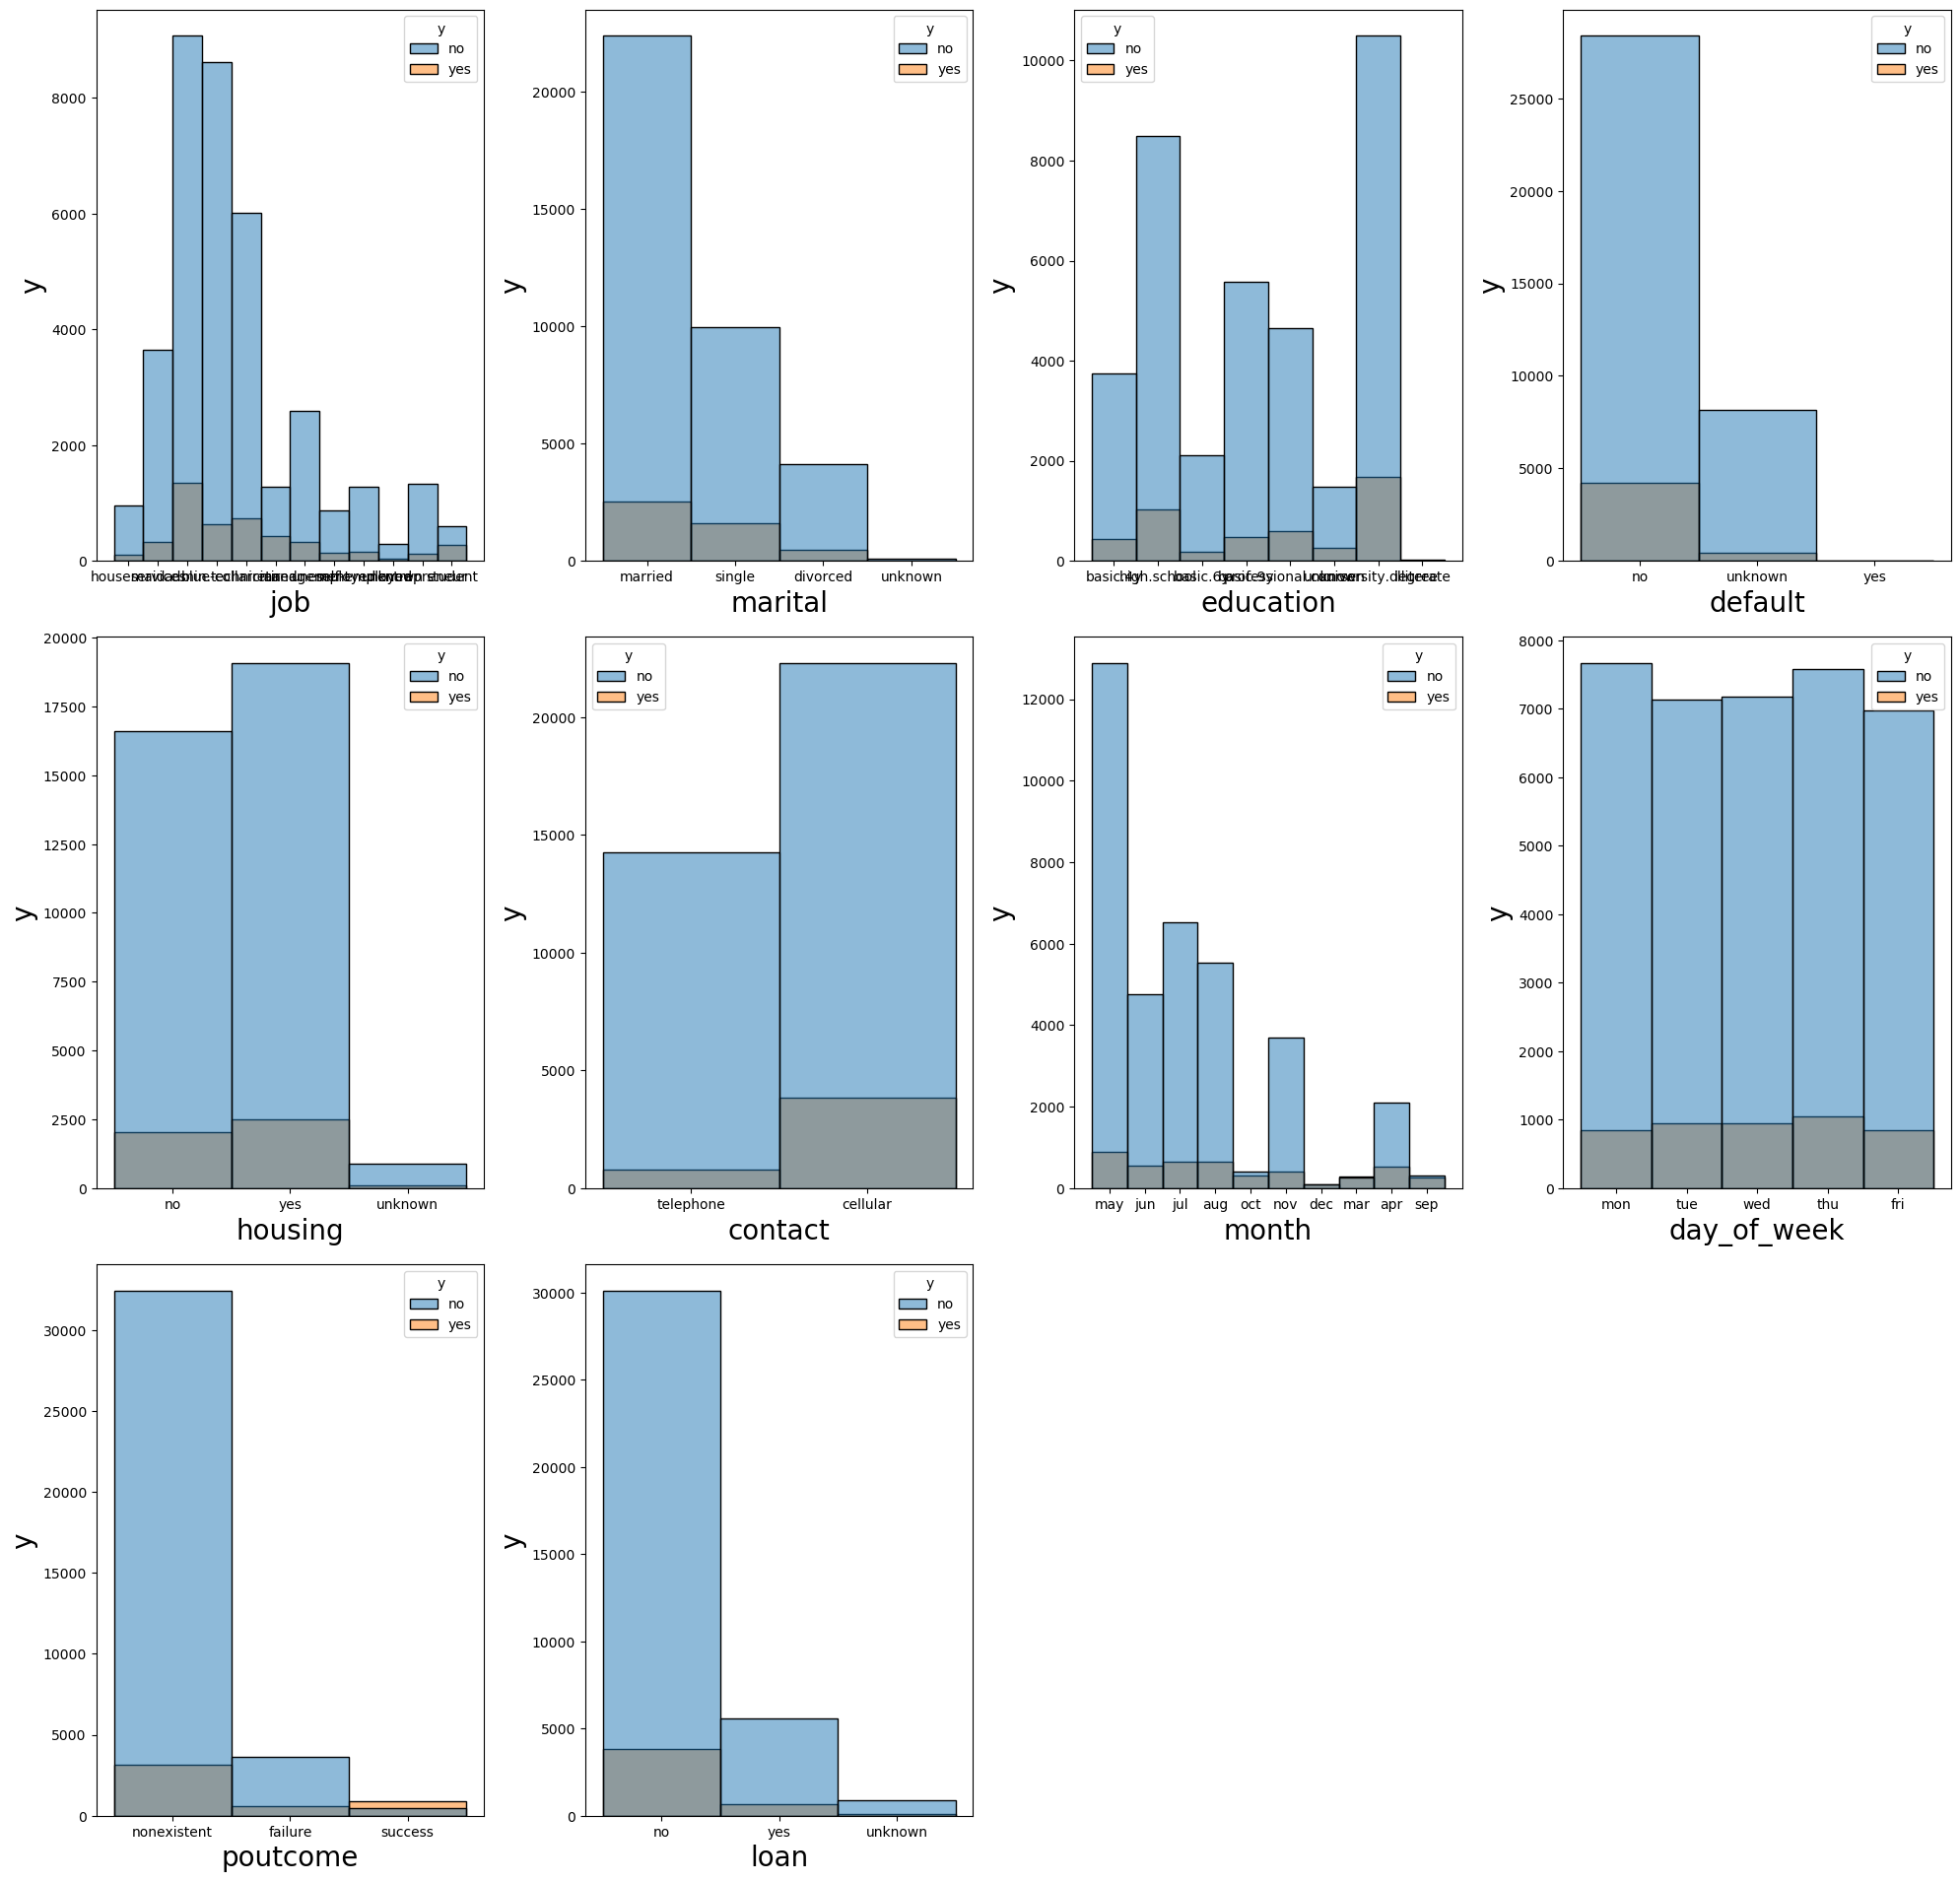

In [28]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in cat_columns:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=cat_columns[column]
                        ,hue=data.y)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('y',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

Data preprocessing

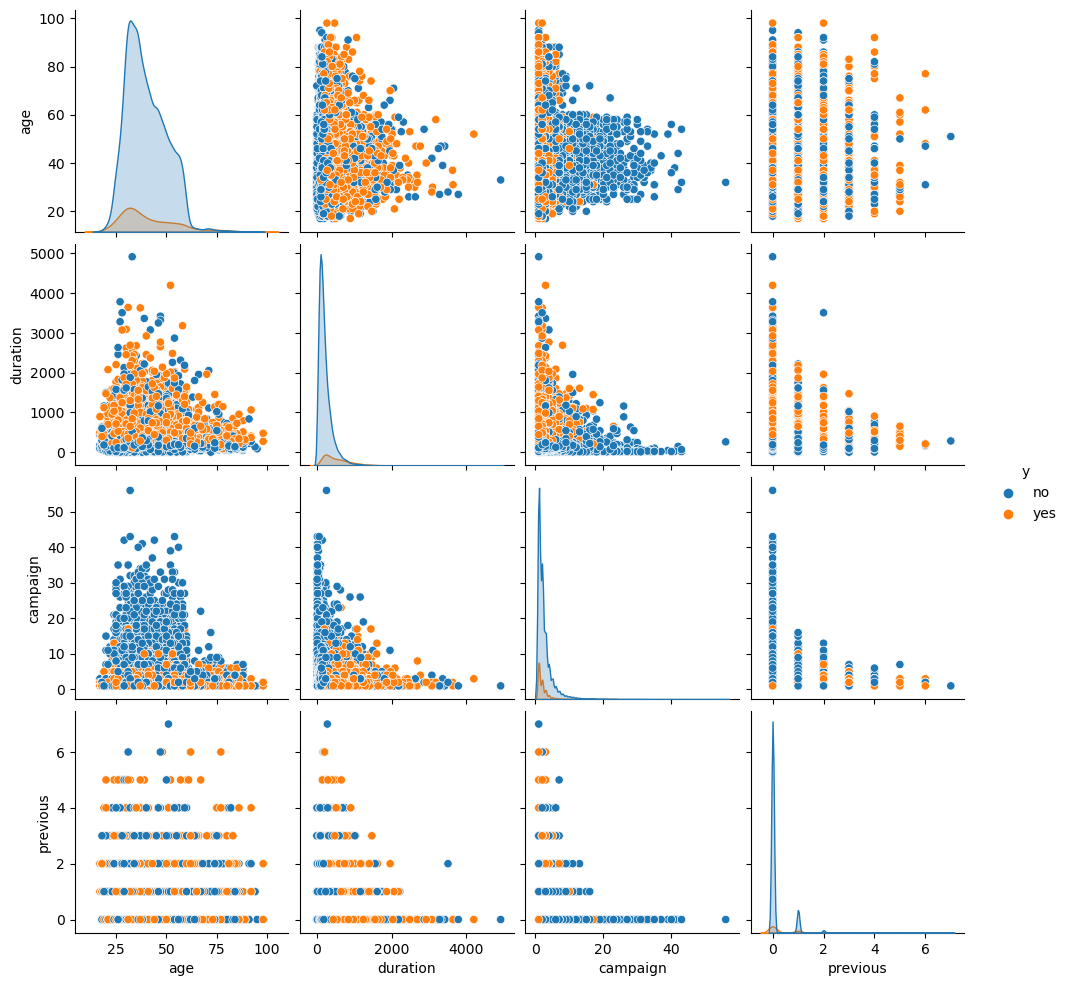

In [29]:
continuous_columns_plus_y = ['age','duration','campaign','previous','y']
continuous_df = data[continuous_columns_plus_y]
sns.pairplot(continuous_df, hue='y')
plt.show()

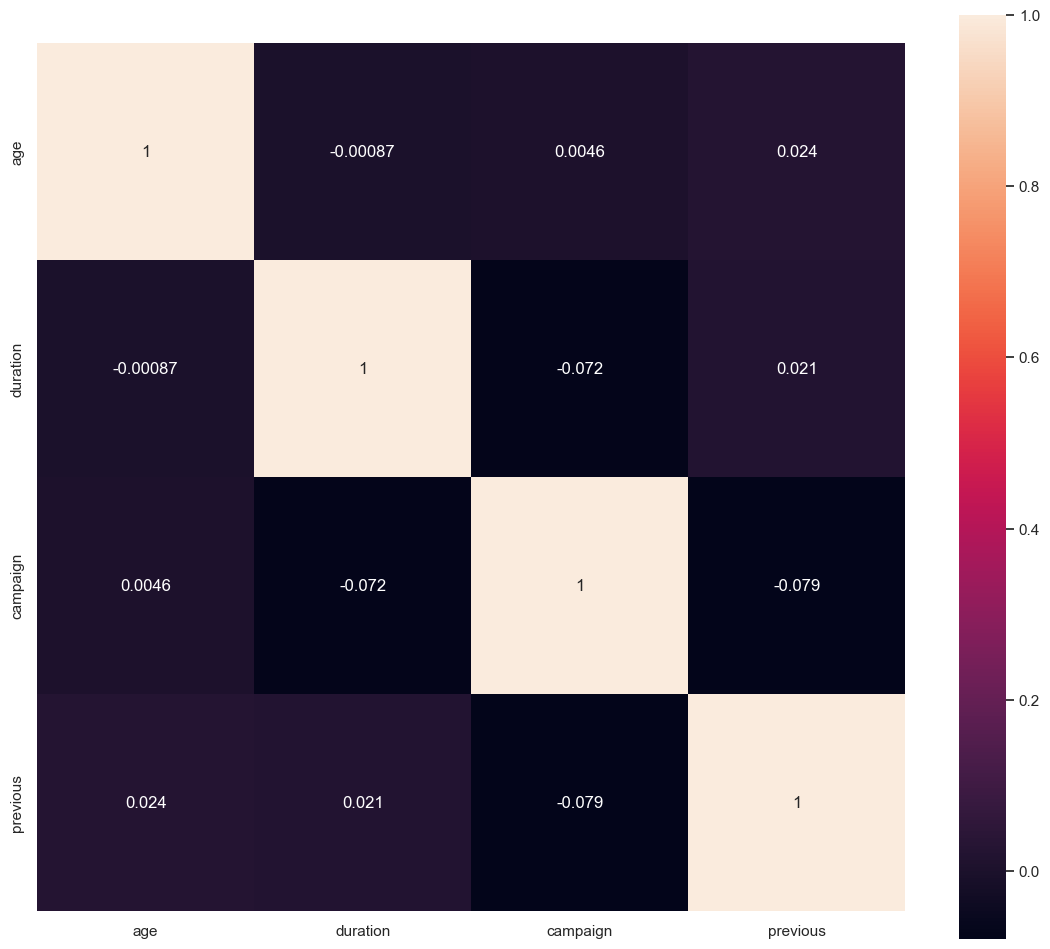

In [30]:
corr_matrix = data[continuous_columns_plus_y].corr()
sns.set(rc = {'figure.figsize':(14,12)})
sns.heatmap(corr_matrix,
            square=True,
            annot=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
plt.show()

KeyError: 'sbscribed_yes'

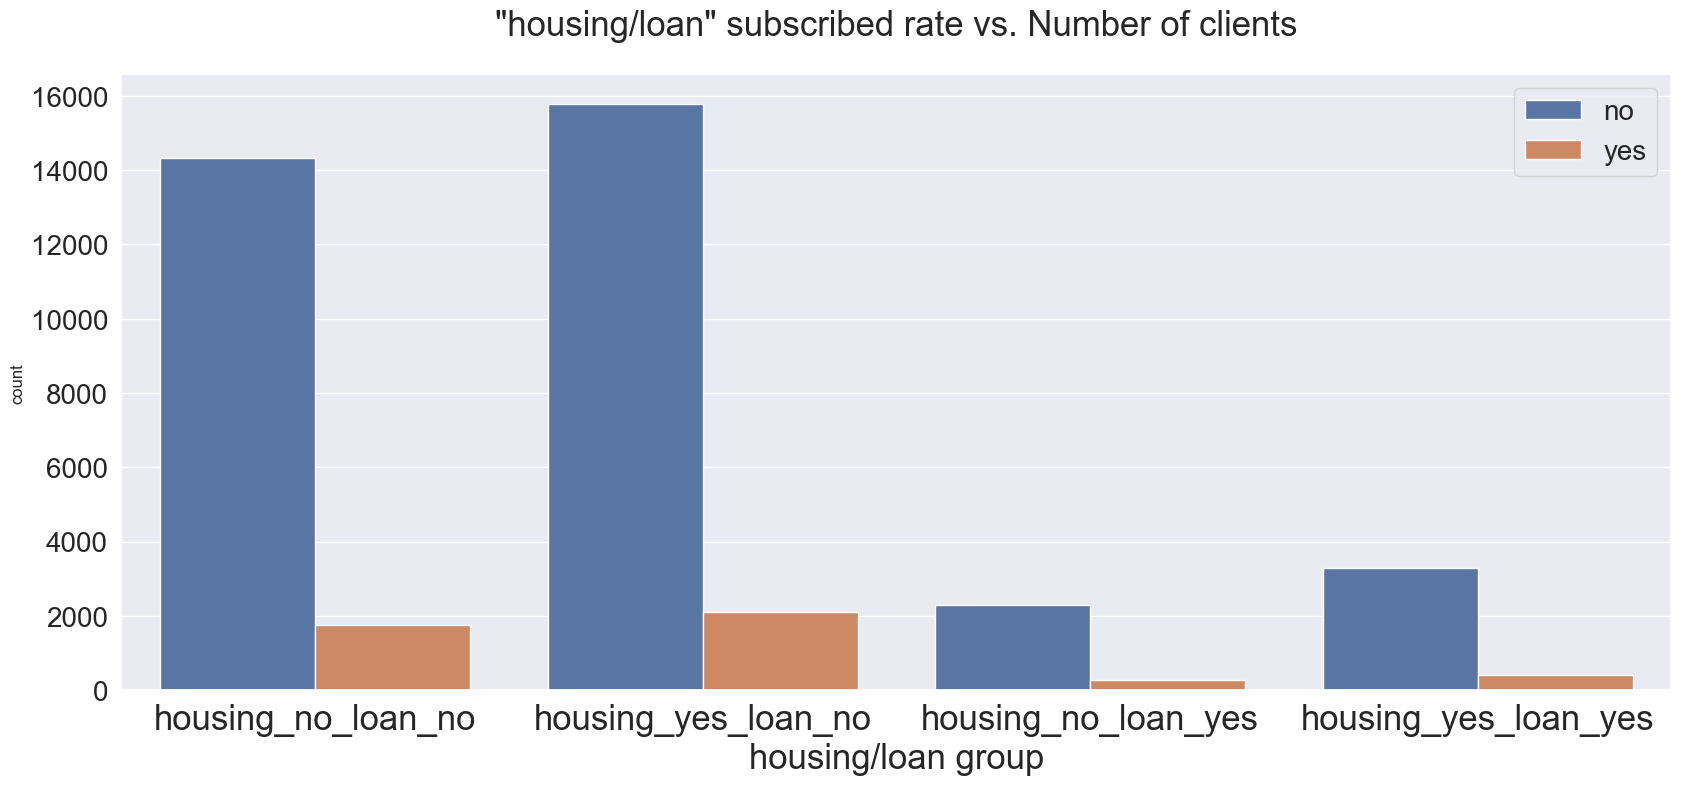

In [31]:
lst = [data]
for column in lst:
    column.loc[(column["housing"] == 'no') & (column["loan"] == 'no'), 'housing_and_loan'] = 'housing_no_loan_no'
    column.loc[(column["housing"] == 'yes') & (column["loan"] == 'no'), 'housing_and_loan'] = 'housing_yes_loan_no'
    column.loc[(column["housing"] == 'no') & (column["loan"] == 'yes'), 'housing_and_loan'] = 'housing_no_loan_yes'
    column.loc[(column["housing"] == 'yes') & (column["loan"] == 'yes'), 'housing_and_loan'] = 'housing_yes_loan_yes'

count_housing_loan_y_pct = pd.crosstab(data['y'],data['housing_and_loan']).apply(lambda x: x/x.sum() * 100)
count_housing_loan_y_pct = count_housing_loan_y_pct.transpose()

housing_loan_num_or_sum_df = pd.DataFrame()
housing_loan_num_or_sum_df = pd.crosstab(data['housing_and_loan'], data['y']).reindex(index=['housing_no_loan_no', 'housing_yes_loan_no', 'housing_no_loan_yes', 'housing_yes_loan_yes'])

order_housing_loan = housing_loan_num_or_sum_df.index.tolist()
plt.figure(figsize=(20,8))
sns.countplot(x="housing_and_loan", hue="y", data=data, order=order_housing_loan)
plt.xlabel('housing/loan group',fontsize=25, y=-1.5)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=20)
plt.title('"housing/loan" subscribed rate vs. Number of clients',fontsize =25, y= 1.05)
plt.legend(fontsize=20)
for i,housing_loan_group in enumerate(housing_loan_num_or_sum_df.index):
    plt.text(i + 0.1, housing_loan_num_or_sum_df.loc[housing_loan_group, 'sbscribed_yes'], "{}%".format(round(count_housing_loan_y_pct.loc[housing_loan_group, 'sbscribed_yes'])),  ha='left', va='bottom', size=20)
    plt.text(i - 0.1, housing_loan_num_or_sum_df.loc[housing_loan_group, 'sbscribed_no'], "{}%".format(round(count_housing_loan_y_pct.loc[housing_loan_group, 'sbscribed_no'])),  ha='right', va='bottom', size=20)

plt.show()

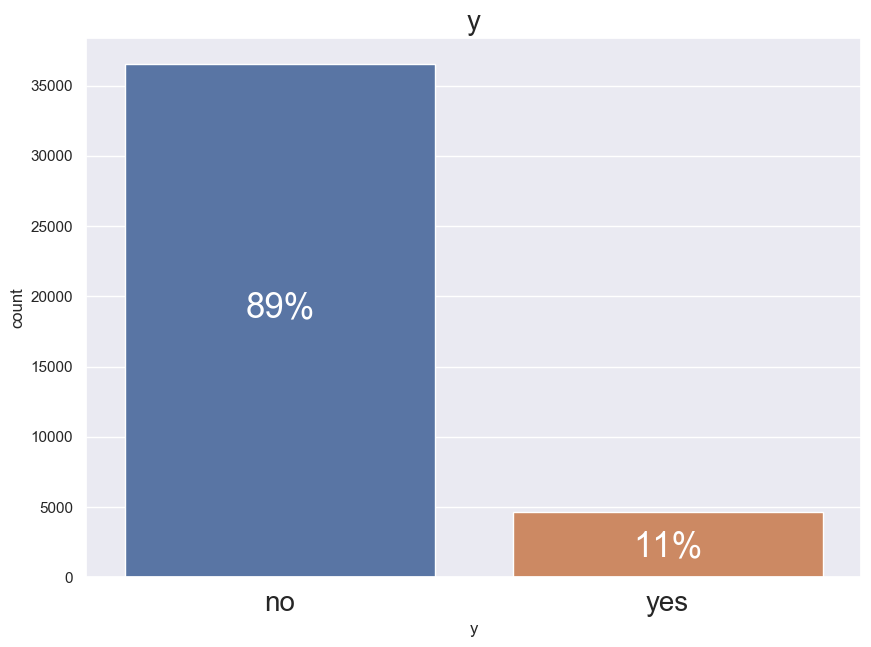

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x="y", data=data)
percentage_y = data['y'].agg('value_counts', normalize=True) * 100
plt.title("y",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

In [33]:
data.isnull().sum() / len(data) * 100

age                 0.000000
job                 0.000000
marital             0.000000
education           0.000000
default             0.000000
housing             0.000000
loan                0.000000
contact             0.000000
month               0.000000
day_of_week         0.000000
duration            0.000000
campaign            0.000000
pdays               0.000000
previous            0.000000
poutcome            0.000000
emp.var.rate        0.000000
cons.price.idx      0.000000
cons.conf.idx       0.000000
euribor3m           0.000000
nr.employed         0.000000
y                   0.000000
housing_and_loan    2.403613
dtype: float64

In [34]:
#It seems there is no missing vlaues

## Feature Selection

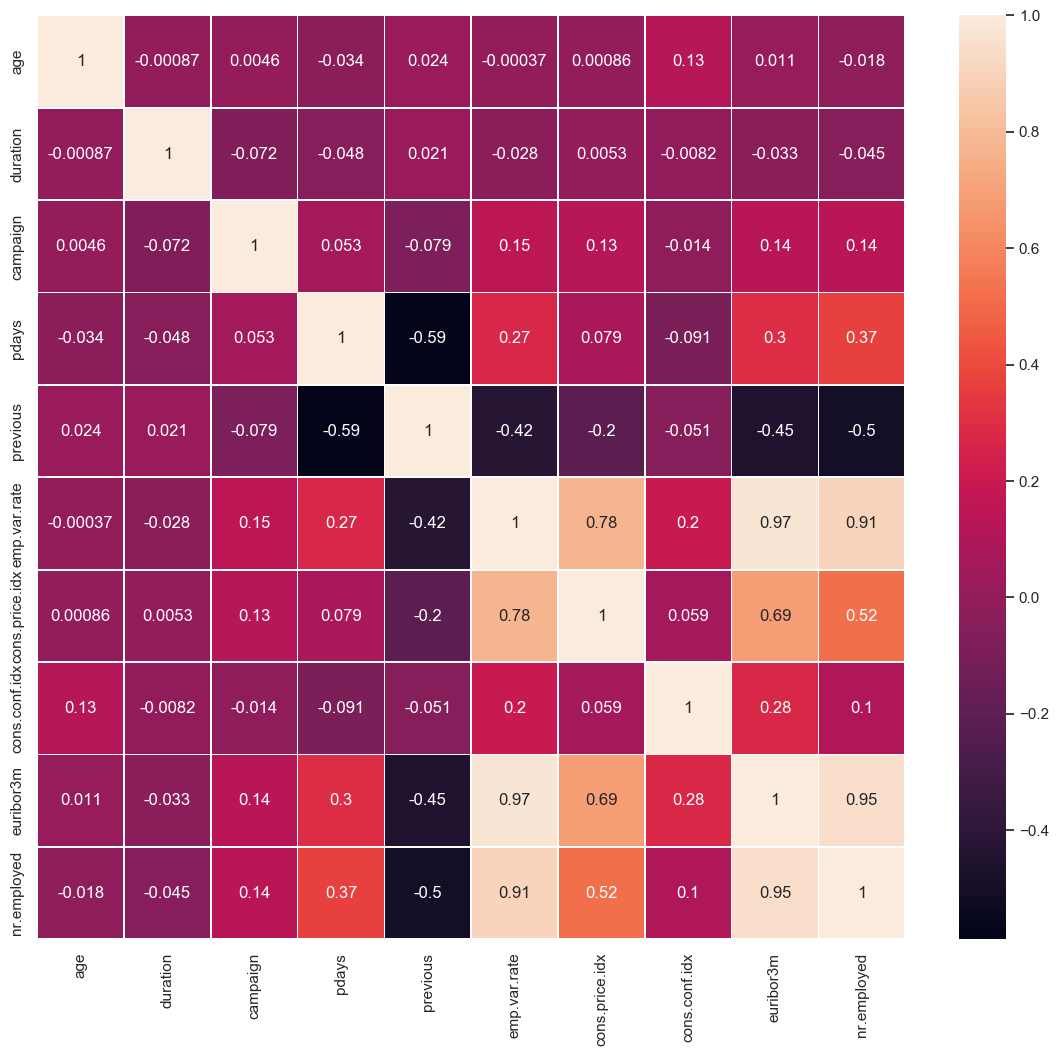

In [35]:
sns.heatmap(data.drop('y',axis=1).corr(),annot=True, linewidths=.5, )# checking for correlation
## NO correlated features are present

In [36]:
# Looking at the correlation between the varibles
#1. emp.var.rate seems to be highly correlated with euribor3m
#2. emp.var.rate seems to be highly correlated with nr.employed
#3. nr.employed seems to be highly correlated with euribor3m

In [37]:
## checking the duplicate rows
data.duplicated().sum()

12

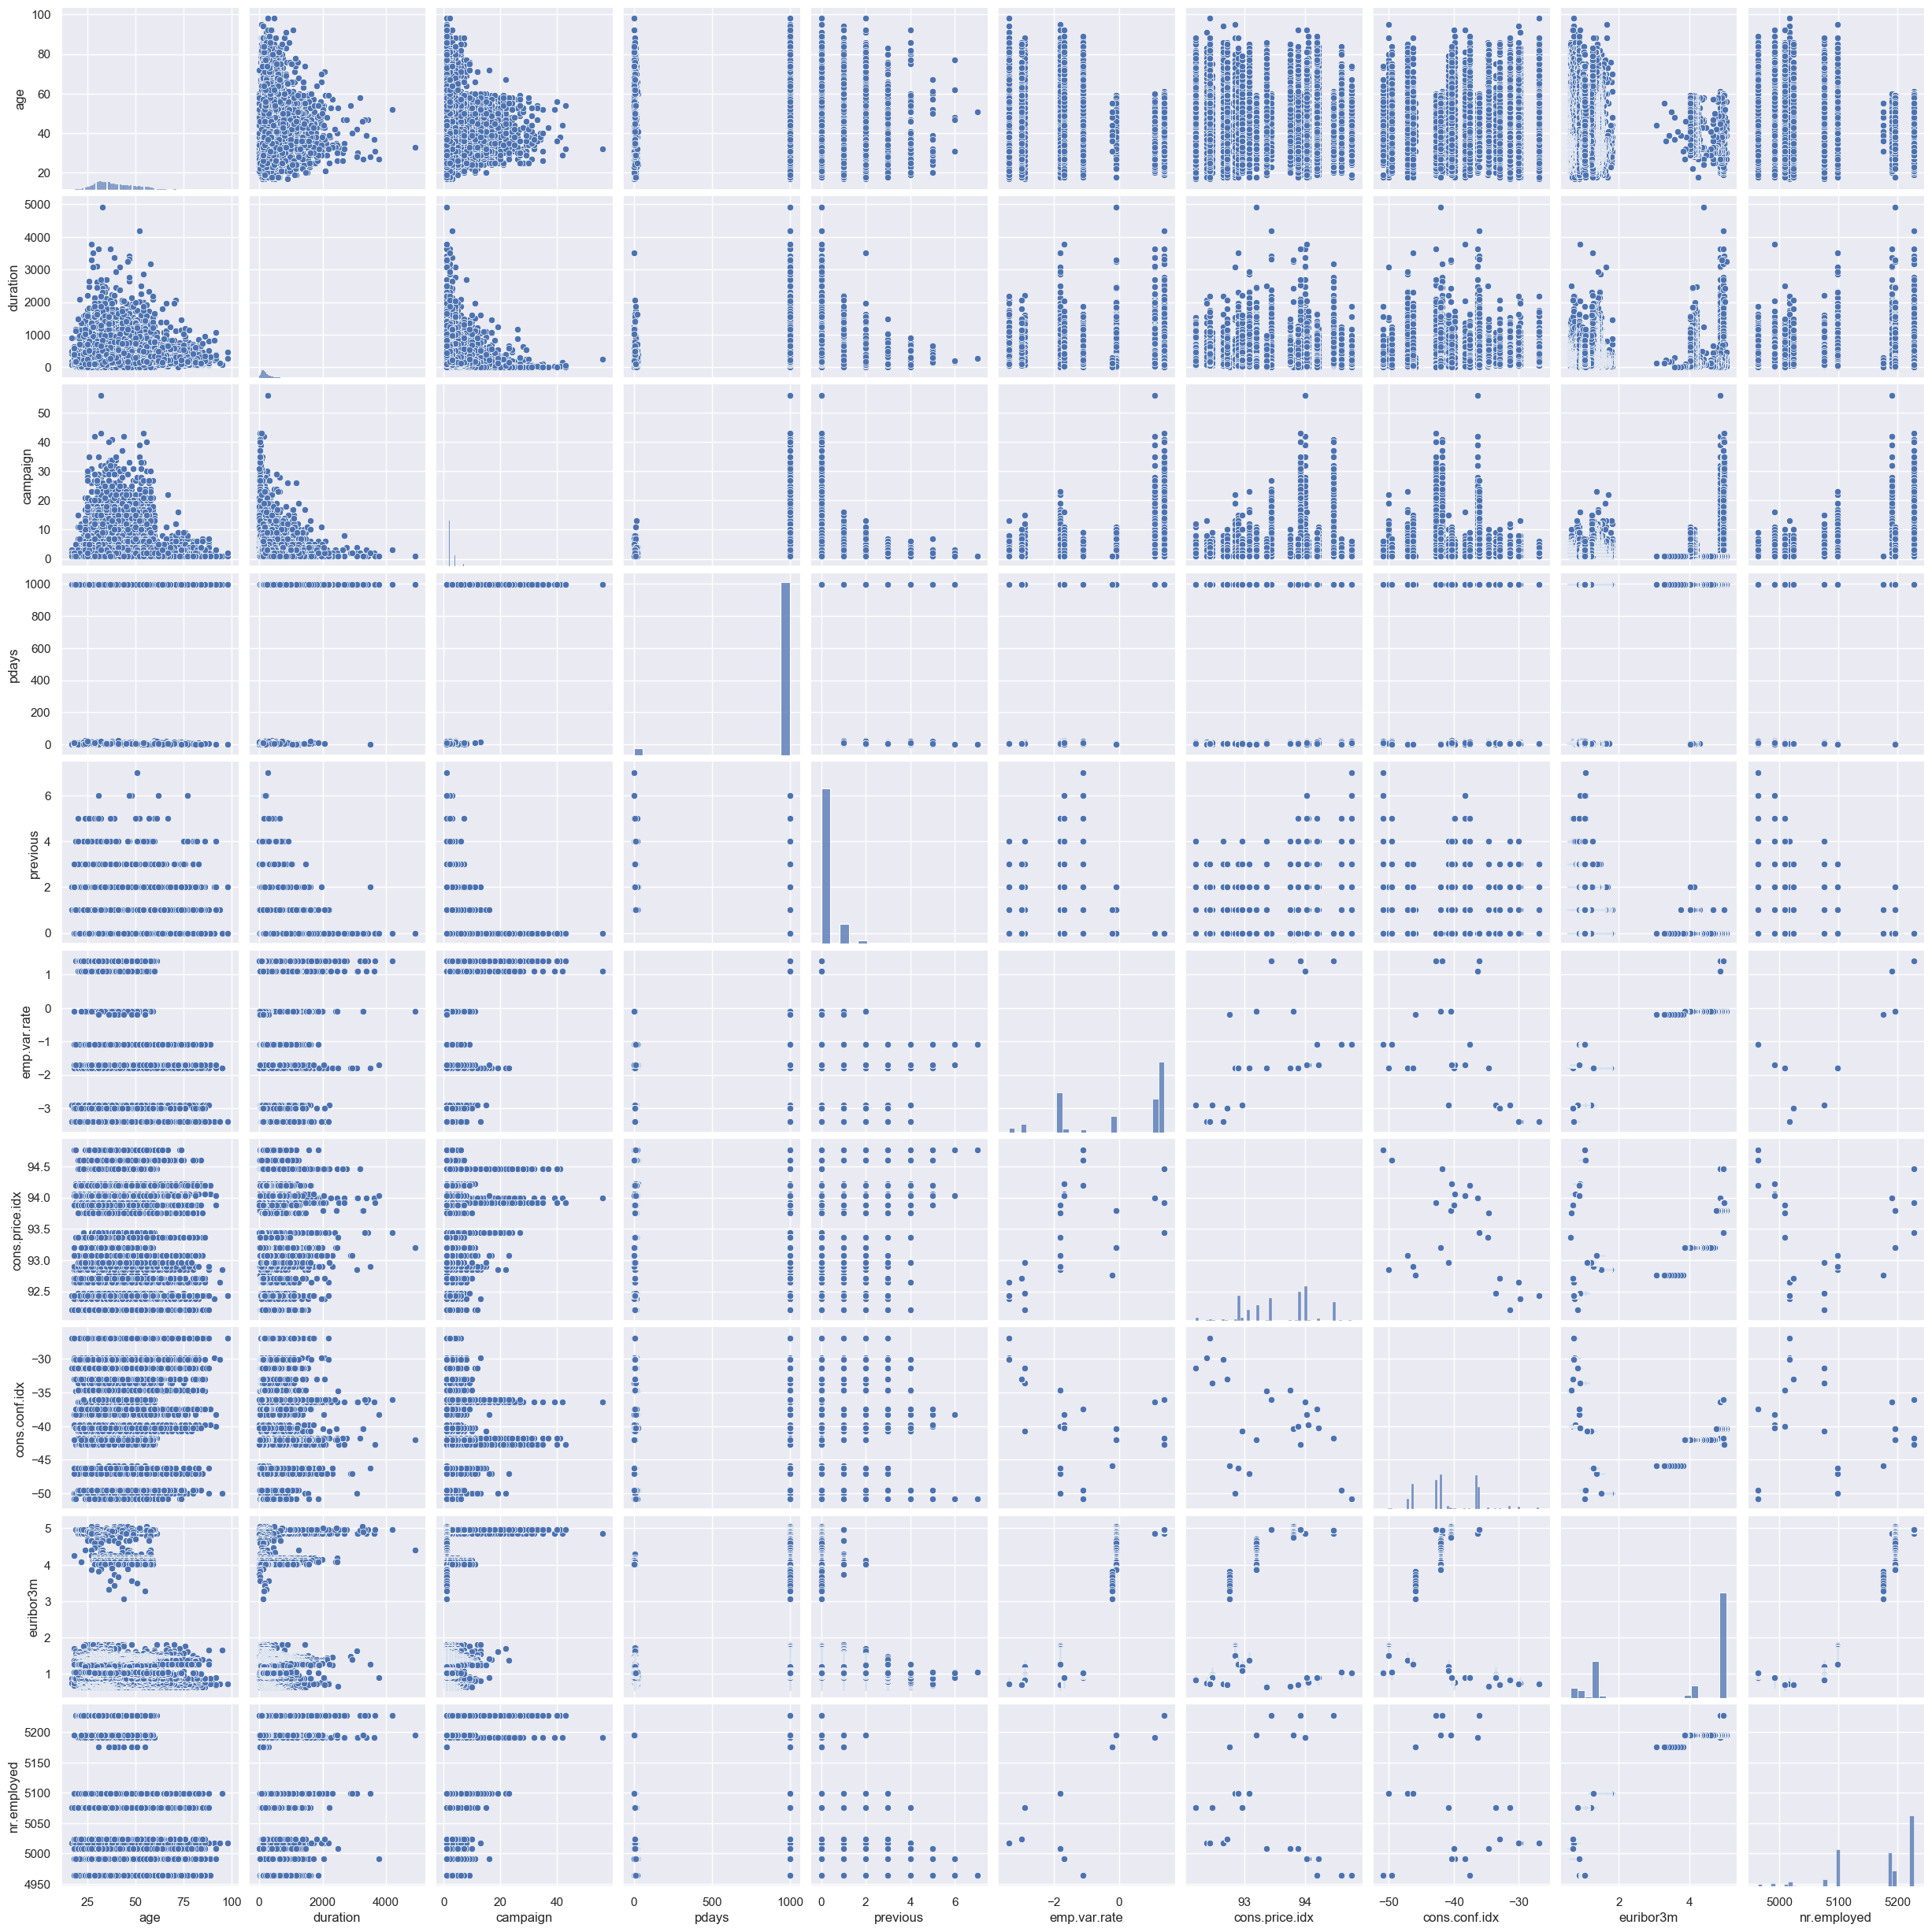

In [38]:
sns.pairplot(data)

In [39]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(cat_columns)
 
# Concatenate the dummies to original dataframe
merged = pd.concat([cat_columns, dummies], axis=1)
 
# drop the values
merged.drop(['job','marital','education','default','housing','contact', 'month', 'day_of_week','poutcome','loan'], axis=1)
 
# print the dataframe
print(merged)

               job  marital            education  default housing    contact  \
0        housemaid  married             basic.4y       no      no  telephone   
1         services  married          high.school  unknown      no  telephone   
2         services  married          high.school       no     yes  telephone   
3           admin.  married             basic.6y       no      no  telephone   
4         services  married          high.school       no      no  telephone   
...            ...      ...                  ...      ...     ...        ...   
41183      retired  married  professional.course       no     yes   cellular   
41184  blue-collar  married  professional.course       no      no   cellular   
41185      retired  married    university.degree       no     yes   cellular   
41186   technician  married  professional.course       no      no   cellular   
41187      retired  married  professional.course       no     yes   cellular   

      month day_of_week     poutcome lo

In [40]:
# Concatenate the dummies to original dataframe
final_data = pd.concat([data, merged], axis=1)
# drop the values
final_data.drop(['job','marital','education','default','housing','contact', 'month', 'day_of_week','poutcome','loan','housing_and_loan'], axis=1, inplace = True)
 
# print the dataframe
print(final_data)

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

In [41]:
#Step 1 Independent and dependent variable creation
X=final_data.drop("y", axis = 1) ## X variable contains all inputs

In [42]:
Y = data['y']

In [43]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,loan_no,loan_unknown,loan_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [45]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [46]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [60]:
dummy = pd.get_dummies(Y_test)
Y_test1 = dummy.drop(['yes'], axis = 1)
Y_test1.rename(columns={"no":"y_test"})

,y_test
1613,0
24123,1
12510,1
10199,1
7337,1
...,...
4427,1
23624,1
18957,1
35430,1


In [47]:
Y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [48]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,Y_train_smote=smote.fit_resample(X_train_scaled,Y_train)

In [50]:
Y_train_smote.value_counts()

no     29240
yes    29240
Name: y, dtype: int64

In [51]:
dummy = pd.get_dummies(Y_train_smote)
Y_train_smote1 = dummy.drop(['yes'], axis = 1)
Y_train_smote1.rename(columns={"no":"y"})

,y
0,1
1,1
2,1
3,1
4,1
...,...
58475,0
58476,0
58477,0
58478,0


In [52]:
print (x_train_smote)

[[-1.15257916 -0.2603409  -0.20234995 ...  0.46350417 -0.15662956
  -0.42484802]
 [ 1.16031806  1.09986735 -0.56498624 ...  0.46350417 -0.15662956
  -0.42484802]
 [-0.57435485  3.23512305  0.16028634 ... -2.15747789 -0.15662956
   2.35378286]
 ...
 [-0.34129332  0.73096918 -0.56498624 ...  0.46350417 -0.15662956
  -0.42484802]
 [-2.01991561  0.34340606 -0.20234995 ...  0.46350417 -0.15662956
  -0.42484802]
 [-1.15837301  0.7605703  -0.56498624 ... -1.99990327 -0.15662956
   2.18673033]]


In [53]:
pd.DataFrame(x_train_smote).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58480 entries, 0 to 58479
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       58480 non-null  float64
 1   1       58480 non-null  float64
 2   2       58480 non-null  float64
 3   3       58480 non-null  float64
 4   4       58480 non-null  float64
 5   5       58480 non-null  float64
 6   6       58480 non-null  float64
 7   7       58480 non-null  float64
 8   8       58480 non-null  float64
 9   9       58480 non-null  float64
 10  10      58480 non-null  float64
 11  11      58480 non-null  float64
 12  12      58480 non-null  float64
 13  13      58480 non-null  float64
 14  14      58480 non-null  float64
 15  15      58480 non-null  float64
 16  16      58480 non-null  float64
 17  17      58480 non-null  float64
 18  18      58480 non-null  float64
 19  19      58480 non-null  float64
 20  20      58480 non-null  float64
 21  21      58480 non-null  float64
 22

In [54]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import sklearn.metrics as me
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

In [55]:
def plot_confusion_matrix(data, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(12, 8))
 
    plt.title("Confusion Matrix",  fontsize=18)
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt="d")
 
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_yticklabels(labels, fontsize=18)
 
    ax.set_xlabel("Predicted Label",fontsize=18)
    ax.set_ylabel("True Label",fontsize=18)

def sbscribed_yes_no(y):
    if y == 1:
        return 'sbscribed_yes'
    else:
        return 'sbscribed_no'

labels = ['sbscribed no','sbscribed yes']

In [ ]:
params = {
    'criterion'   : ['gini', 'entropy'],
    'n_estimators': [10, 100, 300, 500, 1000],
    'max_depth'   : [3, 5, 7, 9, 11, 15, 20]
}

rf = RandomForestClassifier(class_weight = {0:1, 1:20})
grid_search = GridSearchCV(rf, param_grid=params, cv=5, n_jobs = -1)
grid_search.fit(x_train_smote,Y_train_smote1)
best_rf = grid_search.best_estimator_

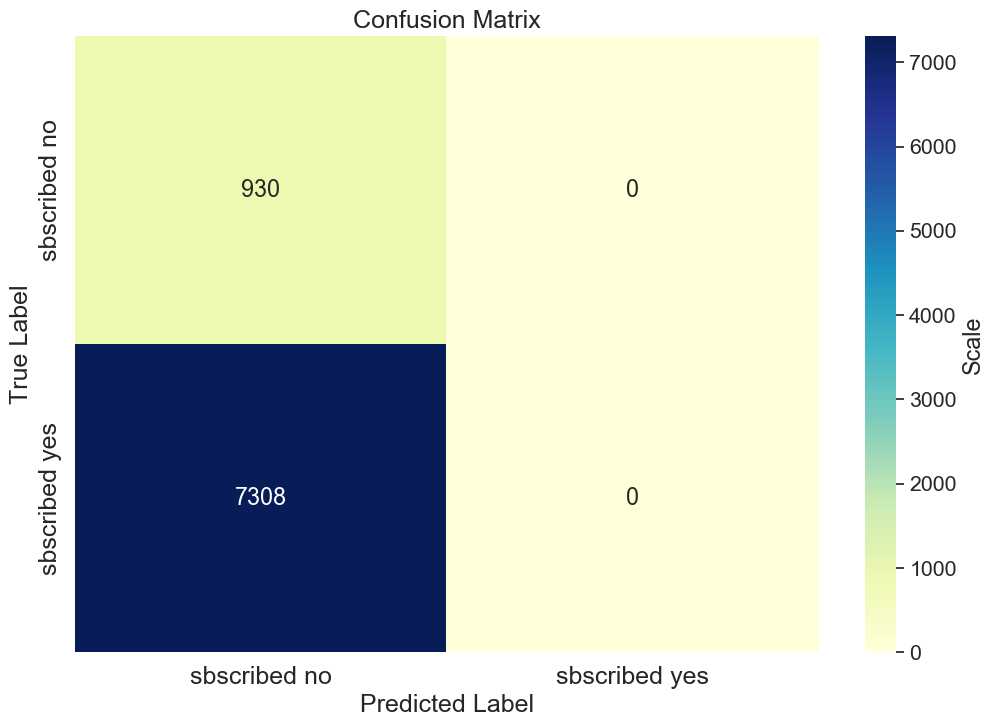

In [61]:
rf_pred = best_rf.predict(X_test)
rf_confusion = me.confusion_matrix(Y_test1, rf_pred)
plot_confusion_matrix(rf_confusion, labels)

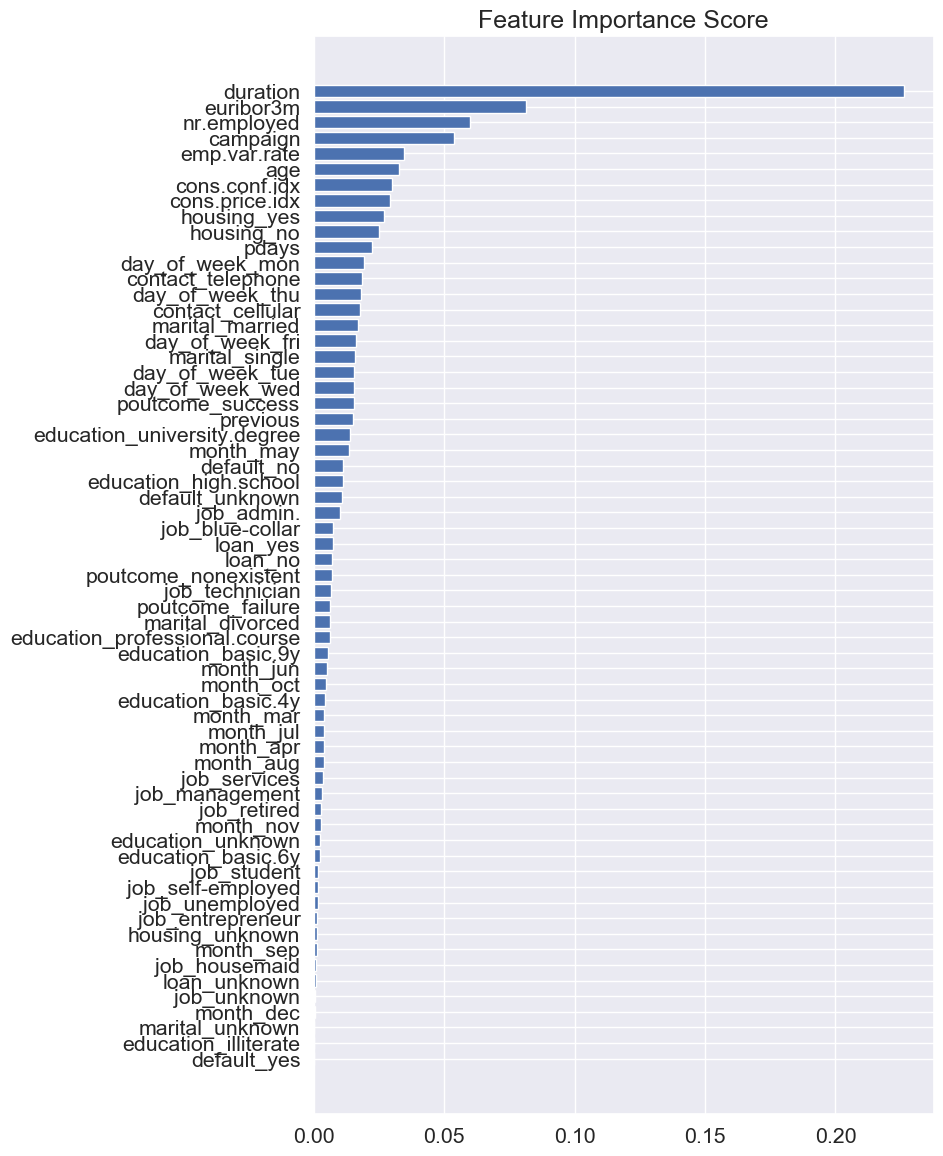

In [65]:
feature_importances_ascending = pd.DataFrame(best_rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)
plt.figure(figsize=(8,14))
plt.title('Feature Importance Score', fontsize=18)
plt.barh(feature_importances_ascending.index, feature_importances_ascending['importance'])
plt.show()